In [1]:
import pandas as pd
import calendar
import numpy as np
import datetime
from numpy import random
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
import seaborn as sns
import os

In [2]:
file_directory = os.getcwd()
print(file_directory)

C:\Users\alena\OneDrive\Documents\DATA 6505\Project\New cloned\Real-Estate-Market-CT\All Workbooks


In [3]:
os.chdir(file_directory)

Loading CT_house_sizes dataset

In [4]:
house_size = 'CT house sizes_sold_2001_2020.csv'
house_size_path = os.path.join('DataSets', house_size)

In [5]:
house_size_path

'DataSets\\CT house sizes_sold_2001_2020.csv'

In [6]:
dtype_house_size = {'status': str,
    'bed': float,
    'bath': float,
    'acre_lot': float,
    'city': str,
    'state': str,
    'zip_code': float,
    'house_size': float,
    'prev_sold_date': str,
    'price': float}

In [7]:
house_size_df = pd.read_csv(house_size_path, dtype=dtype_house_size)

After loading the dataset, investigating the dataset shape and missing values

In [8]:
house_size_df.shape

(43121, 10)

In [9]:
# missing value
house_size_df.isnull().sum()

status               0
bed                622
bath               656
acre_lot          6531
city                 0
state                0
zip_code             0
house_size           0
prev_sold_date       0
price                0
dtype: int64

We can see that our dataset has bed, bath and acre_lot columns with missing data in it.

We should drop N/A's for bed and bath, so these records don't impact our statistical metrics.
We will revisit acre_lot N/A's going forward if needed. 

In [10]:
house_size_df.dropna(subset=["bed","bath"],inplace=True)

In [11]:
house_size_df.isnull().sum()

status               0
bed                  0
bath                 0
acre_lot          6517
city                 0
state                0
zip_code             0
house_size           0
prev_sold_date       0
price                0
dtype: int64

In [12]:
# shape after cleaning the dataset
house_size_df.shape

(42424, 10)

Now with a cleaner dataset we can calculate **the average price per sq ft per each town**.

**Note: the dataset has it as 'city' column.**

In [13]:
average_price_per_city = house_size_df.groupby('city')['price'].mean()
average_size_per_city = house_size_df.groupby('city')['house_size'].mean()
average_price_per_sqft = average_price_per_city / average_size_per_city

In [14]:
formatted_average_price_per_sqft = average_price_per_sqft.map('${:,.2f}'.format)
formatted_average_price_per_sqft

city
Andover          $335.34
Ansonia          $184.77
Ashford          $184.85
Avon             $216.77
Barkhamsted      $181.83
                  ...   
Windsor Locks    $164.36
Wolcott          $182.92
Woodbridge       $224.24
Woodbury         $234.89
Woodstock        $968.96
Length: 171, dtype: object

In [15]:
most_expensive_sqft = average_price_per_sqft.idxmax()
least_expensive_sqft = average_price_per_sqft.idxmin()

In [16]:
# this is per sq ft only
most_expensive_sqft

'Woodstock'

In [17]:
least_expensive_sqft

'Storrs'

We can see that Woodstock has the highest average price per sq ft and Storrs has the lowest. The Town Of Woodstock located in the northeastern area of Connecticut and on the Massachusetts border. 
However, we should account that this doesn't mean the average sale price per town. Many other rich areas in CT have huge houses by its sq ft metric.

Let's see **Top 10 in each category**:

In [18]:
top_10_most_expensive_sqft = average_price_per_sqft.nlargest(10)
top_10_least_expensive_sqft = average_price_per_sqft.nsmallest(10)

In [19]:
top_10_most_expensive_sqft.round(2)

city
Woodstock        968.96
Kent             923.97
Old Greenwich    830.45
Greenwich        807.40
Redding          762.35
Riverside        722.69
Salisbury        692.78
Westport         691.46
Washington       657.04
New Canaan       629.66
dtype: float64

In [20]:
top_10_least_expensive_sqft.round(2)

city
Storrs            85.66
Hartford         103.54
Sterling         104.61
Windham          115.94
Waterbury        119.53
Norwich          126.61
New Britain      129.61
Torrington       133.38
Colebrook        134.24
East Hartford    142.41
dtype: float64


**Now let's review average sale price per each town:**

In [21]:
average_price_per_city = house_size_df.groupby('city')['price'].mean()
average_price_per_city.round(2)

city
Andover           334000.00
Ansonia           278733.60
Ashford           273980.85
Avon              611394.28
Barkhamsted       415521.74
                    ...    
Windsor Locks     224032.20
Wolcott           341714.58
Woodbridge        649502.82
Woodbury          720169.92
Woodstock        2681968.31
Name: price, Length: 171, dtype: float64

In [22]:
# now we have most and least expensive towns per aver price
most_expensive_town = average_price_per_city.idxmax()
least_expensive_town = average_price_per_city.idxmin()

In [23]:
most_expensive_town

'Greenwich'

In [24]:
least_expensive_town

'Storrs'

We can see that the most expesive town to live in is Greenwich based on the dataset provided.
The least expensive town is Storrs. Let's do the same as above and review **Top 10 in each category**.

In [25]:
top_10_most_expensive = average_price_per_city.nlargest(10)
top_10_least_expensive = average_price_per_city.nsmallest(10)

In [26]:
top_10_most_expensive.round(2)

city
Greenwich     4670063.80
New Canaan    3341620.78
Westport      2941201.31
Riverside     2770303.03
Woodstock     2681968.31
Kent          2615972.00
Redding       2398098.41
Washington    2302844.83
Salisbury     2191190.48
Roxbury       1801547.95
Name: price, dtype: float64

In [27]:
top_10_least_expensive.round(2)

city
Storrs            73612.90
Windham          180910.59
Norwich          190970.40
Eastford         210618.75
Torrington       217656.16
Waterbury        220334.82
East Hartford    222167.81
Windsor Locks    224032.20
Plainville       225811.62
Hartford         227645.00
Name: price, dtype: float64

The above are top 10 most and least expensive towns per its average house price sold during 2001-2020.

**Let's make it more visual using matplotlip package:**


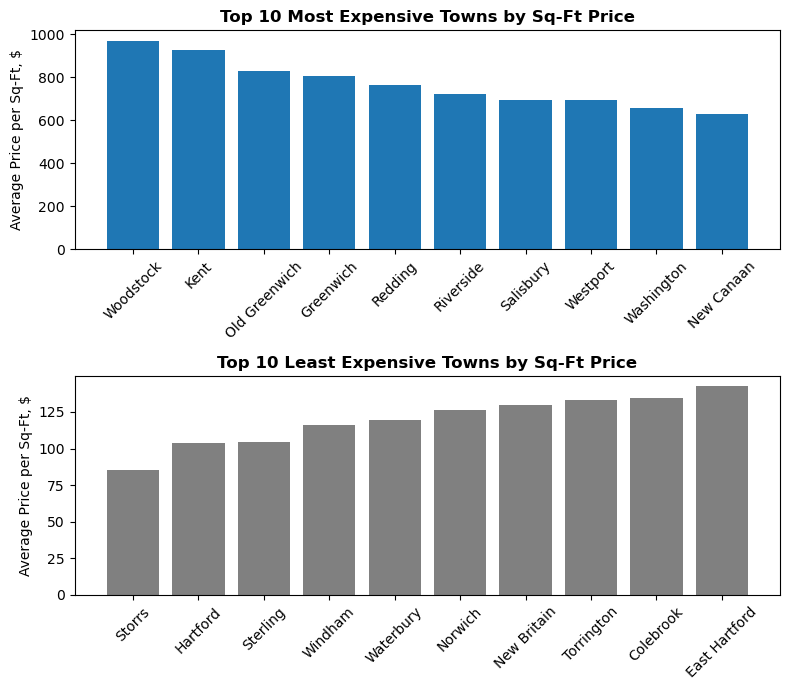

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))

# most expensive
axes[0].bar(top_10_most_expensive_sqft.index, top_10_most_expensive_sqft.values)
axes[0].set_title('Top 10 Most Expensive Towns by Sq-Ft Price', fontweight='bold')
axes[0].set_ylabel('Average Price per Sq-Ft, $')
axes[0].tick_params(axis='x', rotation=45) 

# least expensive
axes[1].bar(top_10_least_expensive_sqft.index, top_10_least_expensive_sqft.values, color='grey')
axes[1].set_title('Top 10 Least Expensive Towns by Sq-Ft Price', fontweight='bold')
axes[1].set_ylabel('Average Price per Sq-Ft, $')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

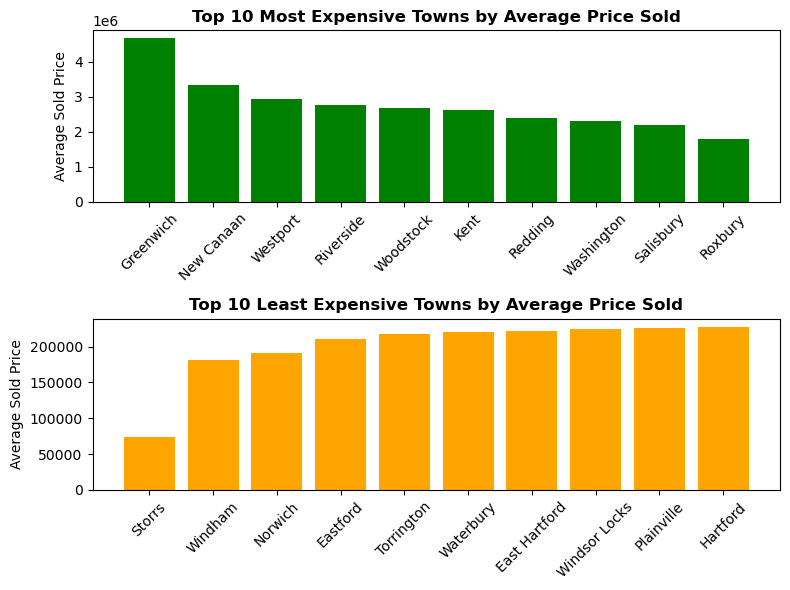

In [29]:
import matplotlib.pyplot as plt
average_price_per_city = house_size_df.groupby('city')['price'].mean()

top_10_most_expensive = average_price_per_city.nlargest(10)
top_10_least_expensive = average_price_per_city.nsmallest(10)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# most expensive
axes[0].bar(top_10_most_expensive.index, top_10_most_expensive.values, color='green')
axes[0].set_title('Top 10 Most Expensive Towns by Average Price Sold', fontweight='bold')
axes[0].set_ylabel('Average Sold Price')
axes[0].tick_params(axis='x', rotation=45) 

# least expensive
axes[1].bar(top_10_least_expensive.index, top_10_least_expensive.values, color='orange')
axes[1].set_title('Top 10 Least Expensive Towns by Average Price Sold', fontweight='bold')
axes[1].set_ylabel('Average Sold Price')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Note:** Top 10 Most Expensive Towns have the average price in millions of dollars, Top 10 Least Expensive Towns have the average price sold in thousands of dollars. 


Now let's find some pricing trends during 2001-2020 for the most expensive and least expensive towns in Connecticut.

First, we will need to convert the column 'prev_sold_date' to a datetime object, as per below:

In [30]:
house_size_df['prev_sold_date'] = pd.to_datetime(house_size_df['prev_sold_date'])
house_size_df['year'] = house_size_df['prev_sold_date'].dt.year


Then, we will group by year and town to find the average price per each year in each town.


In [31]:
# reset_index() methid applied to 'groupby' 
# will return year, city, price as regular columns, index integer first

average_price_year_city = house_size_df.groupby(['year', 'city'])['price'].mean().reset_index()
average_price_year_city.round(2)

,year,city,price
0,2001,Berlin,629900.00
1,2001,Bethel,639000.00
2,2001,Branford,225000.00
3,2001,Bridgeport,350781.37
4,2001,Bristol,268644.93
...,...,...,...
1984,2020,Windsor,403463.81
1985,2020,Windsor Locks,204900.00
1986,2020,Wolcott,319900.00
1987,2020,Woodbridge,823542.86


So we received the average price per each year and each town, we can look at pricing trends now.
Let's select a few towns from the Top 10 Most and Least expensive lists.


In [32]:
greenwich_year_price = average_price_year_city[average_price_year_city['city'] == 'Greenwich']
newcanaan_year_city = average_price_year_city[average_price_year_city['city'] == 'New Canaan']
westport_year_city = average_price_year_city[average_price_year_city['city'] == 'Westport']

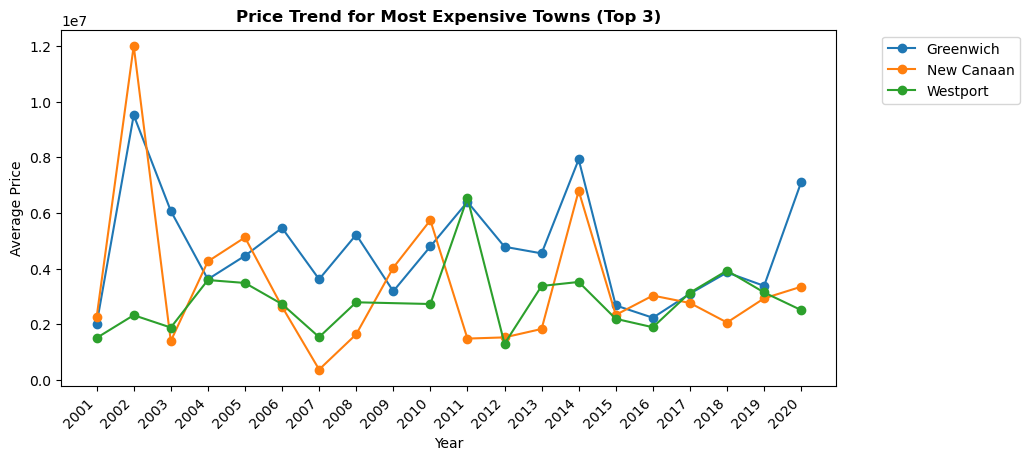

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(greenwich_year_price['year'], greenwich_year_price['price'], marker='o', linestyle='-', label='Greenwich')
plt.plot(newcanaan_year_city['year'], newcanaan_year_city['price'], marker='o', linestyle='-', label='New Canaan')
plt.plot(westport_year_city['year'], westport_year_city['price'], marker='o', linestyle='-', label='Westport')

plt.title('Price Trend for Most Expensive Towns (Top 3)', fontweight='bold')
plt.subplots_adjust(top=1.0)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)

years = greenwich_year_price['year'].astype(int).unique()

plt.xticks(years, rotation=45, ha="right")
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

In [34]:
storrs_year_price = average_price_year_city[average_price_year_city['city'] == 'Storrs']
waterbury_year_price = average_price_year_city[average_price_year_city['city'] == 'Waterbury']
norwich_year_price = average_price_year_city[average_price_year_city['city'] == 'Norwich']
hartford_year_price = average_price_year_city[average_price_year_city['city'] == 'Hartford']

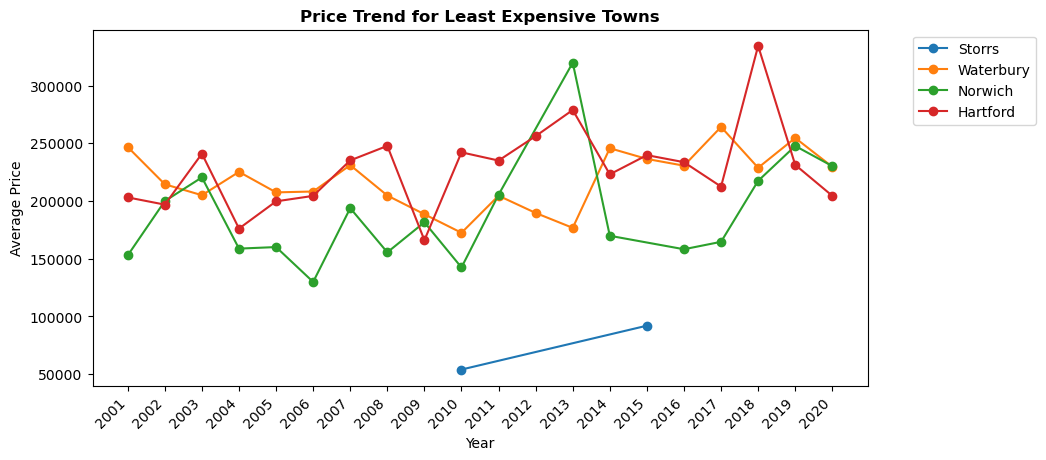

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(storrs_year_price['year'], storrs_year_price['price'], marker='o', linestyle='-', label='Storrs')
plt.plot(waterbury_year_price['year'], waterbury_year_price['price'], marker='o', linestyle='-', label='Waterbury')
plt.plot(norwich_year_price['year'], norwich_year_price['price'], marker='o', linestyle='-', label='Norwich')
plt.plot(hartford_year_price['year'], hartford_year_price['price'], marker='o', linestyle='-', label='Hartford')

plt.title('Price Trend for Least Expensive Towns', fontweight='bold')
plt.subplots_adjust(top=1.0)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)

years = hartford_year_price['year'].astype(int).unique()

plt.xticks(years, rotation=45, ha="right")
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

**Note:** We used selective towns from Top 10 Least Expensive list as several towns have missing pricing data (for example, Storrs shown above). 

**Combined:**


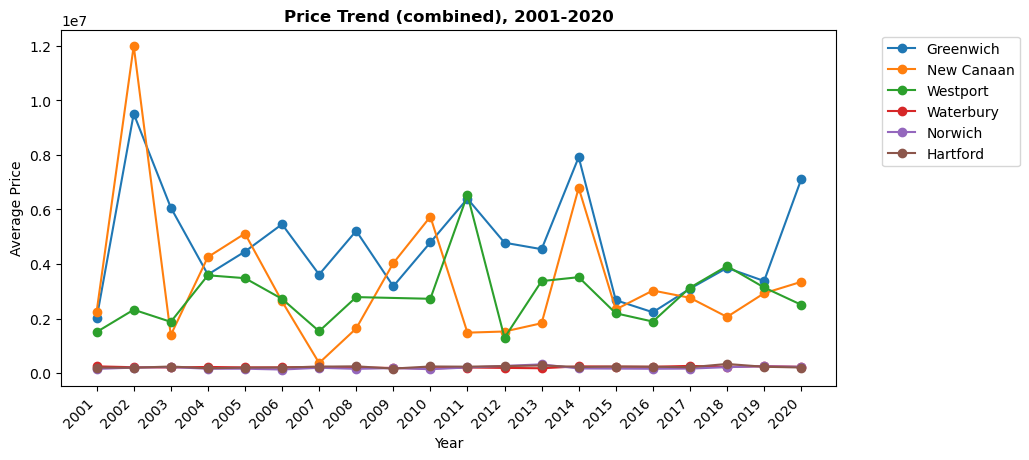

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(greenwich_year_price['year'], greenwich_year_price['price'], marker='o', linestyle='-', label='Greenwich')
plt.plot(newcanaan_year_city['year'], newcanaan_year_city['price'], marker='o', linestyle='-', label='New Canaan')
plt.plot(westport_year_city['year'], westport_year_city['price'], marker='o', linestyle='-', label='Westport')
plt.plot(waterbury_year_price['year'], waterbury_year_price['price'], marker='o', linestyle='-', label='Waterbury')
plt.plot(norwich_year_price['year'], norwich_year_price['price'], marker='o', linestyle='-', label='Norwich')
plt.plot(hartford_year_price['year'], hartford_year_price['price'], marker='o', linestyle='-', label='Hartford')

plt.title('Price Trend (combined), 2001-2020', fontweight='bold')
plt.subplots_adjust(top=1.0)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(False)

years = greenwich_year_price['year'].astype(int).unique()

plt.xticks(years, rotation=45, ha="right")
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

We performed separate graphs as it is hard to see pricing trends for the least expensive towns in millions of $.

We can see price jumps up and down on the graphs for both, most and least expensive towns. We can also notice some differences, as in 2007 when rich areas have significant price descrease compared to the least expensive areas which have price increases or left unchanged. Also, if we review the most recent data trends, in 2020, the most expensive towns have price increases when least expensive mostly unchanged or price decrease. We should make a note here that most expensive towns are located closer to the NY state border and NYC and price increase can be explained by the 2020 pandemic when many people relocated from the NY state to CT. 


Now let's review the historical house prices change during 2001-2020, for all towns represented in our dataset.
Below graph represents **the historical house prices change during 2001-2020**:


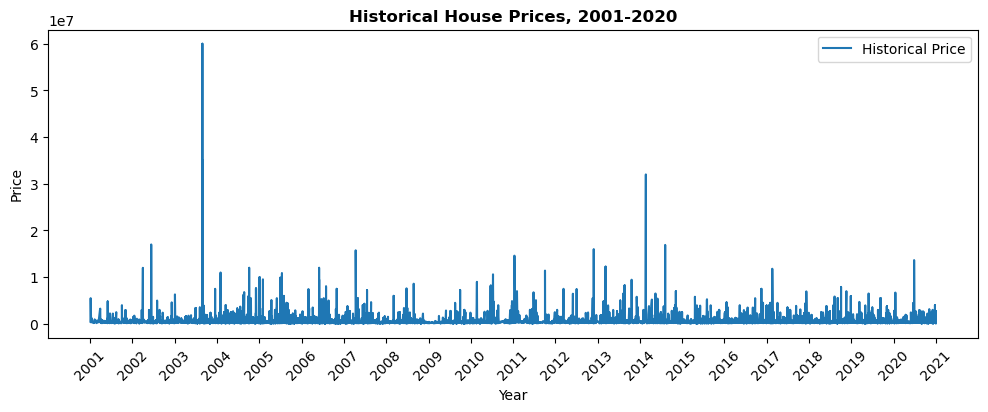

In [37]:
house_size_df['prev_sold_date'] = pd.to_datetime(house_size_df['prev_sold_date'])
house_size_df.sort_values('prev_sold_date', inplace=True)
plt.figure(figsize=(12, 4))
plt.plot(house_size_df['prev_sold_date'], house_size_df['price'], label='Historical Price')
years = YearLocator()
plt.gca().xaxis.set_major_locator(years)
plt.xticks(rotation=45)
plt.title('Historical House Prices, 2001-2020', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Here are some more statistical data for curiosity:

In [38]:
average_beds_per_town = house_size_df.groupby('city')['bed'].mean()
average_beds_per_town.round(1)

city
Andover          3.0
Ansonia          3.5
Ashford          3.0
Avon             3.4
Barkhamsted      3.0
                ... 
Windsor Locks    3.0
Wolcott          3.3
Woodbridge       3.7
Woodbury         3.5
Woodstock        3.5
Name: bed, Length: 171, dtype: float64

In [39]:
towns_highest_beds = house_size_df.groupby('city')['bed'].sum().idxmax()
towns_lowest_beds = house_size_df.groupby('city')['bed'].sum().idxmin()

In [40]:
towns_highest_beds

'Hartford'

**Average Price Trends based on user inputs: number of beds and town.**

For example, if someone is planning to move to CT and want to see pricing trend in several towns that they consider to relocate to, below information can help them to see pricing fluctuations for a short and long-term investment.

In [41]:
house_size_df.dropna(subset=['bed'],inplace=True)
house_size_df.isnull().sum()

status               0
bed                  0
bath                 0
acre_lot          6517
city                 0
state                0
zip_code             0
house_size           0
prev_sold_date       0
price                0
year                 0
dtype: int64

Please enter the number of beds:  2
Please enter the town name:  Stratford


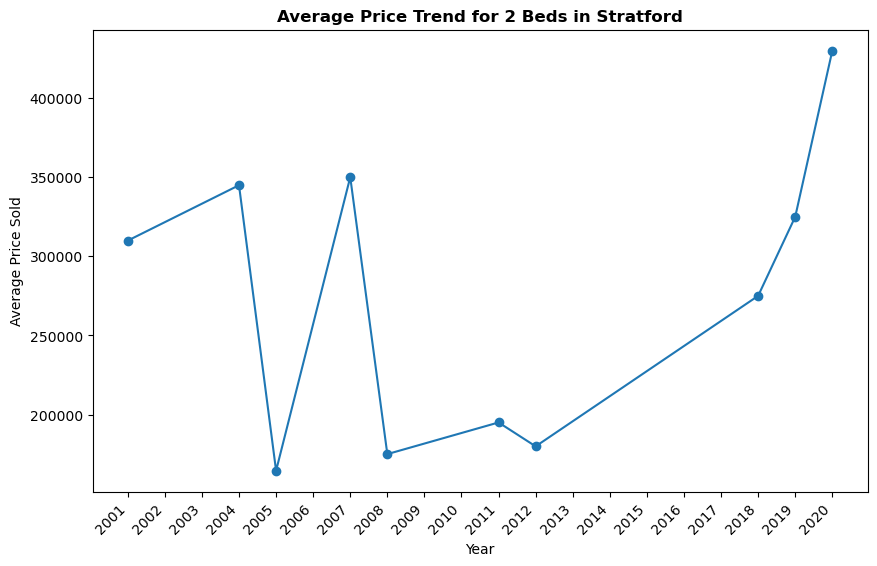

In [42]:
beds_number = int(input('Please enter the number of beds: '))
town = input('Please enter the town name: ')

input_filter = house_size_df[(house_size_df['bed'] == beds_number) & (house_size_df['city'] == town)]

if input_filter.empty:
    print(f'No data available for {beds_number} beds in {town}. Please revise your search criteria or check spelling')

output_average_price = input_filter.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(output_average_price.index, output_average_price.values, marker='o', linestyle='-')
plt.title(f'Average Price Trend for {beds_number} Beds in {town}', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Price Sold')
plt.grid(False)

years = house_size_df['year'].astype(int).unique()
plt.xticks(years, rotation=45, ha="right")
plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

plt.show()



We can also review this from the stand point if someone is planning to move to CT and have a certain amount to spend to purchase a new house, or thinking about a certain amount of mortgage. Below model will help such users to understand what they can afford based on the historical price. Of course, inflation and market fluctuations should be considered for the future years. 

**Now let's check affordable options for town/beds based on the amount of purchase entered by users**

In [44]:
plan_to_spend = float(input('Please enter the price you plan to spend: '))
affordable_houses = house_size_df[house_size_df['price'] <= plan_to_spend]

output_info = affordable_houses.groupby(['city', 'bed'])['price'].mean().reset_index()
unique_output_info = output_info.drop_duplicates(subset=['city', 'bed'])
sorted_output_info = unique_output_info.sort_values('price', ascending=False)
top_5_for_spend = sorted_output_info.head(5)

print(f'For the amount you entered you can afford the following top 5 towns and number of beds: ')
print(top_5_for_spend[['city', 'bed', 'price']])

Please enter the price you plan to spend:  400000


For the amount you entered you can afford the following top 5 towns and number of beds: 
         city  bed     price
391   Redding  3.0  400000.0
13       Avon  4.0  400000.0
416  Simsbury  5.0  400000.0
21    Bethany  4.0  399900.0
364    Oxford  4.0  399900.0


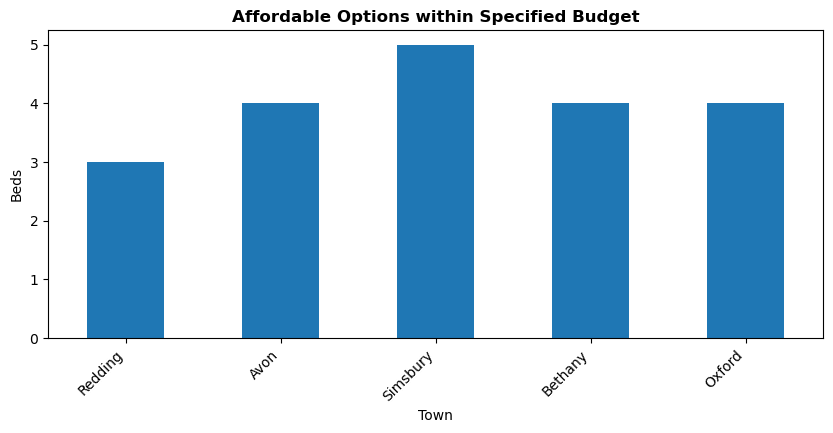

In [45]:
top_5_for_spend.plot(x='city', y='bed', kind='bar', figsize=(10, 4), legend=False)
plt.title('Affordable Options within Specified Budget', fontweight='bold')
plt.xlabel('Town')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Beds')
plt.show()

**Conclusion:**

The above analysis of the housing data provides valuable insights for individuals looking to navigate the real estate market in Connecticut. Through various visualizations and data manipulations, we have uncovered trends and patterns that explain various aspects of the housing scenario in Connecticut for the period 2001-2020.

- **Town-specific trends:** we examined average price trends for both the most and least expensive towns, offering a comprehensive view of how housing prices have fluctuated over the years for these types of towns. This information can be crucial for potential buyers or sellers in these areas.
- **Price Trends over time:** the historical analysis of house prices from 2001 to 2020 provides a broader review of market dynamics. It allows us to identify periods of growth or decline, supporting in strategic decision-making for those interested in long-term investments.
- **Bedroom-Town analysis:** by allowing users to input the number of bedrooms and a specific town, the analysis enables personalized insights into the average price trends. This information can guide prospective homebuyers in making informed decisions based on their preferences and budget.
- **Affordability Analysis:** the affordability analysis empowers users by providing information on towns and the number of bedrooms they can afford within their specified budget. This helps individuals align their housing preferences with financial constraints.


In summary, this analysis supports users with the knowledge needed to navigate the real estate market in Connecticut effectively. 
Understanding the nuances of housing data is essential for anyone engaging in real estate transactions, and this analysis serves as a guide for individuals seeking clarity in a market that is dynamic and continually changing.